In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
import pandas as pd  
import seaborn as sns 

%matplotlib inline

### 1. Entendimento do problema de negócio

Fazendo regressão linear com Python sobre as características e preços das casas de Boston.

Utilizando a base de dados Boston House Prices, faremos uso de regressão linear para entendermos a relação entre as casas da cidade de Boston e seu preço.   
Será que as características das casas influenciam o seu valor?

  **CRIM**: Taxa de crime per capita por cidade  
  **ZN**: Proporção de lotes residenciais num raio de 25,000 pés quadrados  
  **INDUS**: Proporção de acres para negócios que não são varejo por cidade  
  **CHAS**: Proximidade com o rio (1 se o lote toca o rio, 0 se não)  
  **NOX**: Concentração de óxidos nítricos (partes por 10 milhões)  
  **RM**: Numero médio de quartos por residência  
  **AGE**: Proporção de unidades construídas antes de 1940  
  **DIS**: Distância ponderada dos cinco grandes centros de trabalho  
  **RAD**: Índice de acessibilidade à estradas radiais  
  **TAX**: Razão de imposto sobre valor total da propriedade  
  **PTRATIO**: Razão de pupilos por professor na cidade  
  **B**: 1000(Bk - 0.63)², onde Bk é a proporção de negros por cidade  
  **LSTAT**: % porcentagem de status inferior da população  
  **MEDV**: Valor mediano das casas ocupadas em milhares  

### 2. Entendimento dos Dados

In [2]:
boston_dataset = load_boston()

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Data Visualization**

/home/amp/tools/anaconda3/envs/ds-utfpr/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


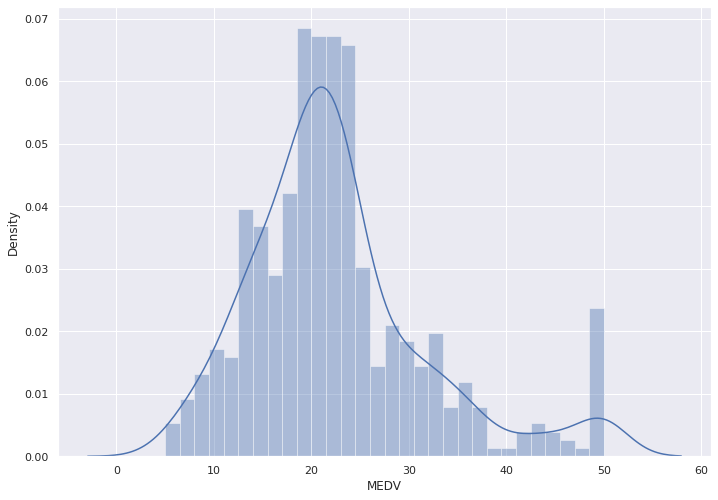

In [4]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=30)
plt.show()

**Correlation matrix**

In [5]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

<AxesSubplot:>

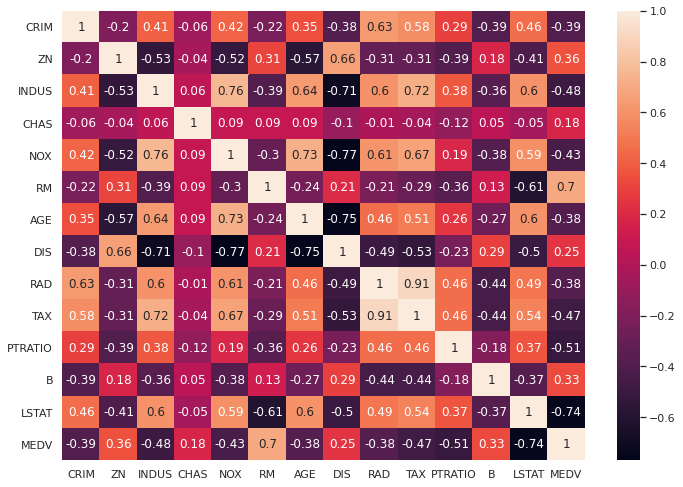

In [6]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

**Observations**




*   Na correlação acima podemos verificar que **MEDV** é fortemente correlacionado a **LSTAT**, **RM**

*  **RAD** e **TAX** são fortemente correlacionados, então podemos remover uma destas variávels para evitar multi-colinearidade.

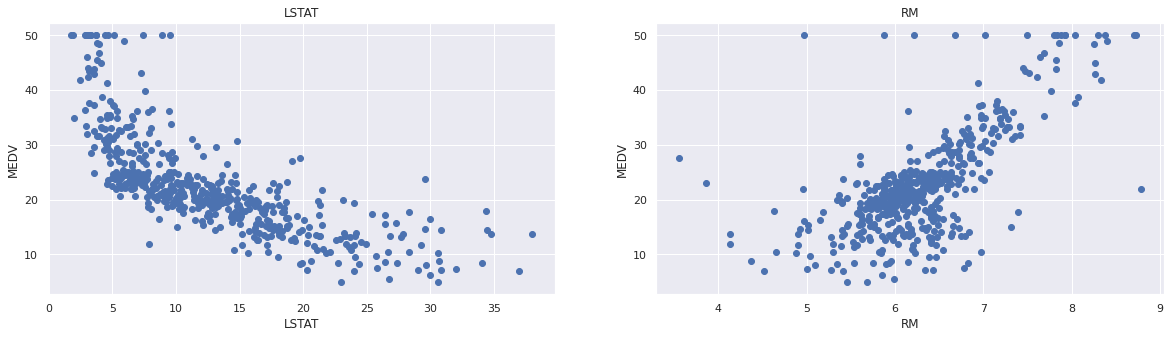

In [7]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Correlação negativa entre LSTAT % porcentagem de status inferior da população e MEDV (Valor mediano das casas ocupadas em milhares)  
Correlação positiva entre RM (Numero médio de quartos por residência) e MEDV (Valor mediano das casas ocupadas em milhares)

**Prepare the data for training**

In [8]:
X = boston.drop("MEDV", axis=1)
Y = boston['MEDV']

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Split the data into training and testing sets**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### 4. Modelagem

In [11]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [12]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.741000992236517
R2 score is 0.7383393920590519




**RMSE (root mean squared error)**: é a medida que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e predições (hipóteses).

O coeficiente de determinação, também chamado de **R²**, é uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples
ou múltipla, aos valores observados de uma variável aleatória. 
O R² varia entre 0 e 1, por vezes sendo expresso em termos percentuais. 
Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear.
Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. 
Por exemplo, um R² = 0.73 significa que o modelo linear explica 73,00% da variância da variável dependente a partir do regressores 
(variáveis independentes) incluídas naquele modelo linear.

In [13]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE (Root Mean Square Error):  is {}'.format(rmse))
print('R2 (coeficiente de determinação): is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE (Root Mean Square Error):  is 4.568292042303176
R2 (coeficiente de determinação): is 0.7334492147453113


### AVALIAÇÃO DOS RESULTADOS

In [14]:
X_test.loc[:,'valor']   = Y_test
X_test.loc[:,'predito'] = y_test_predict

/home/amp/tools/anaconda3/envs/ds-utfpr/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/amp/tools/anaconda3/envs/ds-utfpr/lib/python3.7/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [15]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,valor,predito
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6,37.563118
292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,27.9,32.144451
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6,27.065736
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8,5.670806
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,35.2,35.099826


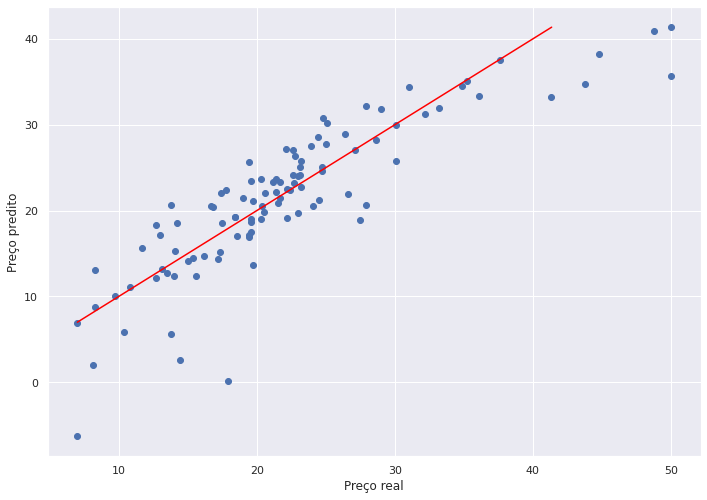

In [16]:
plt.scatter(Y_test, y_test_predict)
range = [Y_test.min(), y_test_predict.max()]
plt.plot(range, range, 'red')
plt.xlabel('Preço real')
plt.ylabel('Preço predito')
plt.show()